# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)  Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.




### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.



## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

For all projects, students will be evaluated on a simple 3 point scale (0, 1, or 2). Instructors will use this rubric when scoring student performance on each of the core project **requirements:** 

Score | Expectations
----- | ------------
**0** | _Does not meet expectations. Try again._
**1** | _Meets expectations. Good job._
**2** | _Surpasses expectations. Brilliant!_

[For more information on how we grade our DSI projects, see our project grading walkthrough.](https://git.generalassemb.ly/dsi-projects/readme/blob/master/README.md)


# Webscraping Careers Future

### We shall search jobs by term : 'Analytics' 1000+ search results, which includes Data jobs 

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re

In [2]:
analytics = pd.read_csv('analyticsfinal.csv')

In [3]:
analytics.shape

(1040, 9)

In [4]:
analytics.dtypes

Title             object
Company           object
Location          object
Range             object
Monthly/Annual    object
Seniority         object
JD                object
Req               object
Industry          object
dtype: object

In [5]:
analytics.columns

Index(['Title', 'Company', 'Location', 'Range', 'Monthly/Annual', 'Seniority',
       'JD', 'Req', 'Industry'],
      dtype='object')

In [6]:
# drop indices that are 'undisclosed' salary
analytics.drop(index=analytics[analytics.Range == 'undisclosed'].index, inplace=True)

In [7]:
analytics.reset_index(drop=True,inplace=True)

In [8]:
analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 9 columns):
Title             921 non-null object
Company           921 non-null object
Location          921 non-null object
Range             921 non-null object
Monthly/Annual    921 non-null object
Seniority         921 non-null object
JD                921 non-null object
Req               921 non-null object
Industry          921 non-null object
dtypes: object(9)
memory usage: 64.8+ KB


### Data Clean up and creating the target variable

In [9]:
#cleanup the salary range column
analytics.Range = analytics.Range.str.replace('$','')
analytics.Range = analytics.Range.str.replace(',','')
analytics.Range = analytics.Range.str.split('to')

In [10]:
analytics['min_salary'] = analytics.Range.map(lambda x:x[0]).astype(float)

In [11]:
analytics['max_salary'] = analytics.Range.map(lambda x:x[1]).astype(float)

In [12]:
analytics['expected_salary'] = (analytics['min_salary'] + analytics['max_salary'])/2

In [13]:
analytics['Monthly_expected_salary'] = analytics[analytics['Monthly/Annual'] == 'Annually']['expected_salary'].apply(lambda x:(x//12))

In [14]:
# add new feature Expected monthly salary  
analytics['Monthly_expected_salary'].fillna(analytics['expected_salary'],inplace=True)

In [15]:
analytics.columns

Index(['Title', 'Company', 'Location', 'Range', 'Monthly/Annual', 'Seniority',
       'JD', 'Req', 'Industry', 'min_salary', 'max_salary', 'expected_salary',
       'Monthly_expected_salary'],
      dtype='object')

In [16]:
# Drop those that we dont need
analytics.drop (columns=['Range','expected_salary'],inplace=True)

In [17]:
# Not surprising that 
analytics.Industry.value_counts().head()

Information Technology          325
Banking and Finance              82
Sciences / Laboratory / R&D      76
Marketing / Public Relations     40
Consulting                       38
Name: Industry, dtype: int64

In [18]:
# clean up the JD and req column
analytics.JD = analytics.JD.str.replace('\r\n',' ')
analytics.Req = analytics.Req.str.replace('\r\n',' ')

In [19]:
# looking at the salary ranges
print('Highest monthly salary',analytics.Monthly_expected_salary.max()) # I gotta get me one of these jobs?
print ('Lowest monthly salary',analytics.Monthly_expected_salary.min())

Highest monthly salary 95000.0
Lowest monthly salary 625.0


In [20]:
# Not sure if this can tell us anything
# employers might just be spamming tags to up their chances of being found.
analytics.Seniority.value_counts() 

Professional                                                        269
Manager                                                             151
Executive                                                           147
Senior Executive                                                     80
Middle Management                                                    56
Non-executive                                                        38
Senior Management                                                    34
Junior Executive                                                     22
Fresh/entry level                                                    18
Middle Management, Manager                                           16
Manager, Professional                                                12
Executive, Senior Executive                                           9
Manager, Senior Executive                                             8
undisclosed                                                     

In [21]:
#let's just take the first one
analytics['Level'] = analytics.Seniority.apply(lambda x:x.split(',')[0])

In [22]:
analytics.Level.unique()

array(['Manager', 'Middle Management', 'Professional', 'Senior Executive',
       'Executive', 'Fresh/entry level', 'Senior Management',
       'Non-executive', 'Junior Executive', 'undisclosed'], dtype=object)

In [23]:
#drop rows without seniority
analytics.drop(index=analytics[analytics.Level == 'undisclosed'].index, inplace=True)

In [24]:
analytics.reset_index(drop=True, inplace=True)

In [25]:
# same for the industry columns?
# there are 118 with second industry out of 921 . Keep the first one
len([list[1] for list in analytics.Industry.apply(lambda x:x.split(',')) if len(list) >=2])

118

### EDA

In [26]:
analytics['Req'] = analytics.Req.apply(lambda x:x.lower())

In [27]:
# about half of the jobs explicitly state they require at least a degree
print('Requires Degree:' , len(analytics[analytics.Req.str.contains('bsc|degree|bachelor')]))
print('Requires Masters:' , len(analytics[analytics.Req.str.contains('master')]))
print('Requires PhD:' , len(analytics[analytics.Req.str.contains('phd')]))

Requires Degree: 475
Requires Masters: 94
Requires PhD: 65


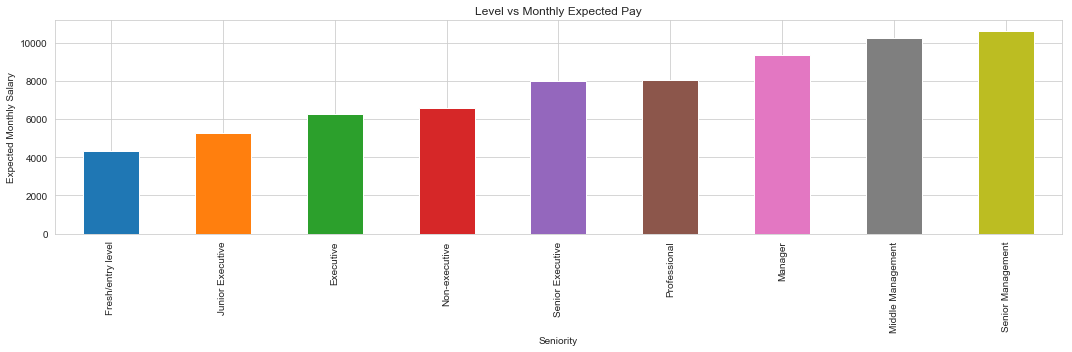

In [28]:
#distribution of seniority vs monthly expected pay 
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
analytics.groupby('Level')['Monthly_expected_salary'].mean().sort_values().plot(kind='bar')
plt.title ('Level vs Monthly Expected Pay')
plt.xlabel('Seniority')
plt.ylabel('Expected Monthly Salary')
plt.tight_layout()
plt.show()

In [29]:
#Outliers? Lets try to visualised the outliers

In [30]:
analytics['Level_num'] = analytics['Level'].replace({'Senior Management':8,
                            'Middle Management':7,
                            'Manager':6,
                            'Professional':5,
                            'Senior Executive':4,
                            'Executive':3,
                            'Junior Executive':2,
                            'Non-executive':1,
                            'Fresh/entry level':0,
                           'undisclosed':'undisclosed'})

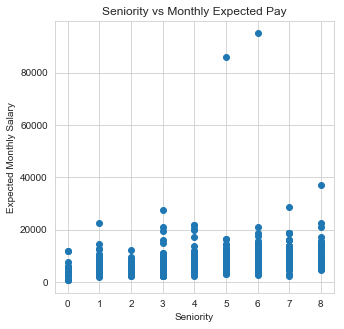

In [31]:
#distribution of seniority vs monthly expected pay 
# there are 2 clear outliers. 
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.scatter(analytics['Level_num'],analytics['Monthly_expected_salary'])
plt.title ('Seniority vs Monthly Expected Pay')
plt.xlabel('Seniority')
plt.ylabel('Expected Monthly Salary')
plt.show()

In [32]:
# which 2? big salary range offered (160,000 - 12,000) and (120,000 - 70,000)
# Looks like another 0 is wrongly added. Let's correct that 
analytics[analytics['Monthly_expected_salary']>40000]


,Title,Company,Location,Monthly/Annual,Seniority,JD,Req,Industry,min_salary,max_salary,Monthly_expected_salary,Level,Level_num
683,Data Scientist,EXIGER SINGAPORE PTE. LTD.,"OCBC CENTRE, 65 CHULIA STREET 049513",Monthly,Professional,Position Summary We are looking for a resource...,requirements professional experience required ...,"Information Technology, Professional Services",12000.0,160000.0,86000.0,Professional,5
808,Business Intelligence Finance Senior Analyst /...,KERRY CONSULTING PTE. LTD.,"SUNTEC TOWER FOUR, 6 TEMASEK BOULEVARD 038986",Monthly,Manager,- Established Industry Leader - Newly Created ...,requirements the successful candidate should h...,Accounting / Auditing / Taxation,70000.0,120000.0,95000.0,Manager,6


In [33]:
print(analytics.iloc[683,:]) # amended
print(analytics.iloc[808,:]) # Drop! Outlier

Title                                                         Data Scientist
Company                                           EXIGER SINGAPORE PTE. LTD.
Location                                OCBC CENTRE, 65 CHULIA STREET 049513
Monthly/Annual                                                       Monthly
Seniority                                                       Professional
JD                         Position Summary We are looking for a resource...
Req                        requirements professional experience required ...
Industry                       Information Technology, Professional Services
min_salary                                                             12000
max_salary                                                            160000
Monthly_expected_salary                                                86000
Level                                                           Professional
Level_num                                                                  5

In [34]:
# amending the error

analytics.iloc[683,10] =14000
analytics.iloc[683,9] =16000

In [35]:
analytics.drop(index=808, inplace=True)

In [36]:
analytics.reset_index(drop=True, inplace=True)

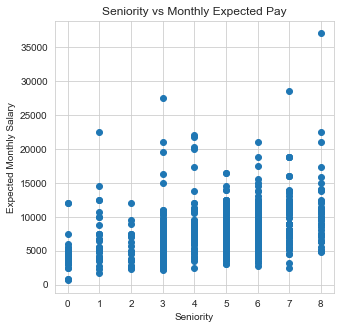

In [37]:
#distribution of seniority vs monthly expected pay 
# Outliers removed.  
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.scatter(analytics['Level_num'],analytics['Monthly_expected_salary'])
plt.title ('Seniority vs Monthly Expected Pay')
plt.xlabel('Seniority')
plt.ylabel('Expected Monthly Salary')
plt.show()

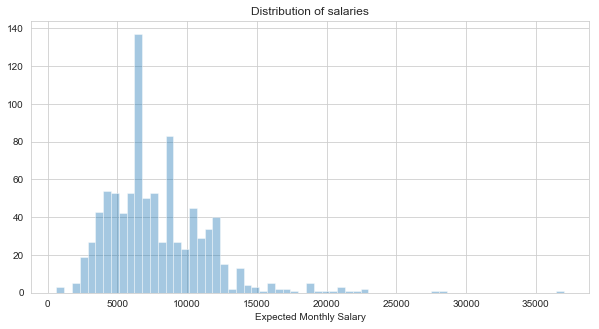

In [38]:
# Salaries are very right skewed. Highest wage earners make multiples of the mode ,median and mean
plt.figure (figsize = (10,5))
sns.distplot(analytics['Monthly_expected_salary'],norm_hist=False,kde=False,bins = 65)
plt.title ('Distribution of salaries')
plt.xlabel ('Expected Monthly Salary')
plt.show()

In [39]:
analytics.sample(10)

,Title,Company,Location,Monthly/Annual,Seniority,JD,Req,Industry,min_salary,max_salary,Monthly_expected_salary,Level,Level_num
328,Software Engineer (Frontend),NTUC ENTERPRISE NEXUS CO-OPERATIVE LIMITED,undisclosed,Monthly,Professional,"Today, we have embarked on a transformation an...",requirements requirements · 4 years of ...,Information Technology,6000.0,12000.0,9000.0,Professional,5
89,Data Engineer (Big Data),COMPANY UNDISCLOSED,undisclosed,Monthly,Executive,Being part of the Data Engineering Team to con...,requirements you have 10+ years hands-on exper...,"Engineering, Information Technology, Others",6000.0,8000.0,7000.0,Executive,3
339,Principal Engineer (Android),NTUC ENTERPRISE NEXUS CO-OPERATIVE LIMITED,undisclosed,Monthly,Professional,"Today, we have embarked on a transformation an...",requirements requirements · 6 years of ...,Information Technology,8000.0,15000.0,11500.0,Professional,5
254,Intern / Associate Engineer (Fullstack),NTUC ENTERPRISE CO-OPERATIVE LTD,undisclosed,Monthly,Professional,NTUC Enterprise is part of NTUC’s Group of Soc...,requirements requirements · 3 years of...,Information Technology,5000.0,8000.0,6500.0,Professional,5
71,"Consultant, BU Planning",DELL GLOBAL B.V. (SINGAPORE BRANCH),"MARINA BAY FINANCIAL CENTRE, 8 MARINA BOULEVAR...",Monthly,Senior Management,"Consultant, Marketing Operations – BU Planning...",requirements qualifications & experience • ...,Marketing / Public Relations,10000.0,18000.0,14000.0,Senior Management,8
337,Intern (Backend),NTUC ENTERPRISE NEXUS CO-OPERATIVE LIMITED,undisclosed,Monthly,Professional,"Today, we have embarked on a transformation an...",requirements requirements · 3 years of...,Information Technology,5000.0,8000.0,6500.0,Professional,5
437,Data Analyst,WEGO PTE. LTD.,"SHAW TOWERS, 100 BEACH ROAD 189702",Monthly,"Fresh/entry level, Executive, Non-executive, J...",As part of the Data Science and Analytics team...,requirements experience with statistical analy...,Information Technology,4500.0,7500.0,6000.0,Fresh/entry level,0
44,Senior Solutions Architect - Technical Lead,PALO IT SINGAPORE PTE. LTD.,51B CIRCULAR ROAD 049406,Monthly,Senior Executive,About us PALO IT is an innovation & agile deve...,requirements still you: ✔ you are a creative i...,Information Technology,6000.0,12000.0,9000.0,Senior Executive,4
739,"Assistant Vice President, Data Management Office",COMPANY UNDISCLOSED,undisclosed,Monthly,Middle Management,The Data Management Office (DMO) is a business...,requirements degree in analytical disciplines ...,Banking and Finance,6000.0,9000.0,7500.0,Middle Management,7
191,Data Analyst (64803),SIEMENS PTE. LTD.,"THE SIEMENS CENTRE, 60 MACPHERSON ROAD 348615",Monthly,Professional,Your new role – challenging and future-oriente...,requirements your qualifications – solid and a...,"Consulting , Engineering",4500.0,8000.0,6250.0,Professional,5


In [40]:
cols = analytics.columns.tolist()

In [41]:
# assigning predictors for a baseline regressor
cols =['Title',
 'Company',
 'Industry',
 'Level']

In [42]:
analytics[cols]

,Title,Company,Industry,Level
0,Delivery Lead – Singapore (PACE Analytics),RIO TINTO SINGAPORE HOLDINGS PTE. LTD.,Information Technology,Manager
1,"VP / AVP, Machine Learning Engineer, Group Con...",DBS BANK LTD.,Banking and Finance,Middle Management
2,"VP / AVP, Senior Data Engineer, Group Consumer...",DBS BANK LTD.,Banking and Finance,Middle Management
3,"VP / AVP, Sr. Frontend Developer, Group Consum...",DBS BANK LTD.,Banking and Finance,Middle Management
4,Research Scientist - Energy Systems,GLOBESOFT SERVICES PTE. LTD.,Sciences / Laboratory / R&D,Professional
5,International Business Analyst,SCHNEIDER ELECTRIC IT LOGISTICS ASIA PACIFIC P...,Consulting,Senior Executive
6,"IT Security Analyst (VPN, Firewall, Proxy, Dat...",TECHCOM SOLUTIONS & CONSULTANCY PTE. LTD.,"Banking and Finance, Information Technology",Middle Management
7,Senior Manager / Manager / Senior Consultant,DELOITTE & TOUCHE ENTERPRISE RISK SERVICES PTE...,Risk Management,Manager
8,Senior Manager / Manager / Senior Consultant,DELOITTE & TOUCHE ENTERPRISE RISK SERVICES PTE...,Risk Management,Manager
9,Marketing Operations Specialist,TALEND SINGAPORE PTE. LTD.,Marketing / Public Relations,Executive


### Build a Random Forest Regressor

In [43]:
X= analytics[cols]
X = pd.get_dummies(X, drop_first=True)

In [44]:
X.shape

(913, 1107)

In [45]:
y = analytics['Monthly_expected_salary']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\Zach\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [48]:
regressor = RandomForestRegressor(n_estimators = 100, oob_score=True,random_state=42 )
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [49]:
print('OOB score:',regressor.oob_score_)

OOB score: 0.27083705984279716


In [50]:
y_pred = regressor.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('R2:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.344977876625296
Mean Absolute Error: 1925.303190215977
Mean Squared Error: 7771169.560550578
Root Mean Squared Error: 2787.6817538145524


In [52]:
### 0.4 R^2 : Quite bad looks for ways to improve it later. Maybe using gridsearch ?

### Using classification instead with NLP

In [53]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zach\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
#above median salary
analytics['above_med_salary'] = (analytics["Monthly_expected_salary"] > 7000).apply(lambda x:1 if x == True else 0)

In [55]:
analytics.sample(10)

,Title,Company,Location,Monthly/Annual,Seniority,JD,Req,Industry,min_salary,max_salary,Monthly_expected_salary,Level,Level_num,above_med_salary
175,Cloud Deployment and Migration Engineer,CLOUD COMRADE PTE. LTD.,"GSM BUILDING, 141 MIDDLE ROAD 188976",Monthly,"Executive, Non-executive",Cloud adoption isn’t just about the migration....,requirements candidates with existing aws or g...,Information Technology,4000.0,8000.0,6000.0,Executive,3,0
422,"Regional Talent Consultant, Asia Pacific",ROCHE DIAGNOSTICS ASIA PACIFIC PTE LTD,"APERIA, 8 KALLANG AVENUE 339509",Monthly,Professional,"Who we are At Roche, 94,000 people across 100 ...",requirements who you are you are someone who i...,Healthcare / Pharmaceutical,4000.0,8500.0,6250.0,Professional,5,0
757,Influencer Marketing Specialist,ZIMPLISTIC PRIVATE LIMITED,"THE CURIE, 83 SCIENCE PARK DRIVE 118258",Monthly,"Executive, Senior Executive",About the role: Rotimatic is looking for an ex...,requirements key requirements: 2-5+ years at a...,Marketing / Public Relations,4000.0,7000.0,5500.0,Executive,3,0
145,APAC Strategy Development Assistant Manager,UPS ASIA GROUP PTE. LTD.,"UPS HOUSE, 22 CHANGI SOUTH AVENUE 2 486064",Monthly,Manager,Summary The incumbent will be a member of the ...,requirements requirements possess a bachelor’s...,"Accounting / Auditing / Taxation, Engineering,...",5256.0,7008.0,6132.0,Manager,6,0
850,Data Engineer,PROPERTYGURU PTE. LTD.,"TRIPLEONE SOMERSET, 111 SOMERSET ROAD 238164",Monthly,"Professional, Executive",Our websites attract more than 100 million mon...,requirements bachelor’s degree in it or releva...,"Engineering, Information Technology",5000.0,7000.0,6000.0,Professional,5,0
496,Visual Designer,ACRONIS ASIA RESEARCH AND DEVELOPMENT PTE. LTD.,"SUNTEC TOWER THREE, 8 TEMASEK BOULEVARD 038988",Monthly,Executive,We are currently looking for a VISUAL DESIGNER...,requirements you will be awesome at this role ...,Design,4000.0,6000.0,5000.0,Executive,3,0
823,Lead UI / UX Designer,FUNDNEL PTE. LTD.,"NANKIN ROW, 3 PICKERING STREET 048660",Monthly,Senior Management,"We're looking for passionate, design-driven pe...",requirements skills & experience required 3-5 ...,Design,6000.0,8000.0,7000.0,Senior Management,8,0
618,"Executive / Assistant Manager, Actuarial",AIA SINGAPORE PRIVATE LIMITED,"AIA TOWER, 1 ROBINSON ROAD 048542",Monthly,Executive,"Provide support on product pricing, profit tes...",requirements 2-4 years of relevant actuarial e...,Insurance,4500.0,6500.0,5500.0,Executive,3,0
678,Application Architect,IBM SINGAPORE PTE LTD,"IBM PLACE, 9 CHANGI BUSINESS PARK CENTRAL 1 48...",Monthly,Professional,Cloud Application Migration Services (CAMS) is...,requirements as above,Information Technology,7800.0,10000.0,8900.0,Professional,5,1
562,Senior Copywriter,DDB WORLDWIDE PTE LTD,"PICO CREATIVE CENTRE, 20 KALLANG AVENUE 339411",Monthly,Executive,DDB is the Most-Awarded Effie agency in Singap...,requirements required skills & preferred quali...,Advertising / Media,5000.0,8000.0,6500.0,Executive,3,0


In [56]:
corpus = []
for i in range(0,913):
    req = re.sub('[^a-zA-Z]',' ',analytics['Req'][i])
    req = req.split()
    req = [word for word in req if not word in set(stopwords.words('english'))]
    req = ' '.join(req)
    corpus.append(req)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer( )
X = tfidf.fit_transform(corpus).toarray()
y = analytics["above_med_salary"]

In [58]:
X.shape

(913, 5604)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [61]:
y_pred = classifier.predict(X_test)

In [62]:
# Baseline is 0.50 since we use median

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[65 33]
 [20 65]]
             precision    recall  f1-score   support

          0       0.76      0.66      0.71        98
          1       0.66      0.76      0.71        85

avg / total       0.72      0.71      0.71       183

0.7103825136612022


In [64]:
#let's try the JD column
corpus = []
for i in range(0,913):
    req = re.sub('[^a-zA-Z]',' ',analytics['JD'][i])
    req = req.split()
    req = [word for word in req if not word in set(stopwords.words('english'))]
    req = ' '.join(req)
    corpus.append(req)

In [65]:
tfidf = TfidfVectorizer( )
X = tfidf.fit_transform(corpus).toarray()
y = analytics["above_med_salary"]

In [66]:
X.shape

(913, 7375)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
classifier=BernoulliNB()
classifier.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [69]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[69 29]
 [29 56]]
             precision    recall  f1-score   support

          0       0.70      0.70      0.70        98
          1       0.66      0.66      0.66        85

avg / total       0.68      0.68      0.68       183

0.6830601092896175


In [90]:
# Precision = TP /TP+FP
# Recall = TP/TP + TN

## Ans:

#### We can see that the requirements (req) column is a better predictor than JD column in predicting if a a job will have higher than median salary. 

#### comparing the classification reports , we can see that the Req has a higher accuracy score , as well as precision and recall overall.  

### Not sure how we can combine all the features tho!

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


In [70]:
# We shall try to predict 'Level' as the target variable. 

In [71]:
y = analytics['Level']

In [78]:
analytics['Level'].value_counts()

Professional         278
Manager              172
Executive            166
Senior Executive      80
Middle Management     78
Senior Management     46
Non-executive         38
Fresh/entry level     31
Junior Executive      24
Name: Level, dtype: int64

In [79]:
print('Baseline:',(278/len(analytics['Level'])))

Baseline: 0.3044906900328587


In [72]:
#let's try the JD column
corpus = []
for i in range(0,913):
    req = re.sub('[^a-zA-Z]',' ',analytics['JD'][i])
    req = req.split()
    req = [word for word in req if not word in set(stopwords.words('english'))]
    req = ' '.join(req)
    corpus.append(req)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer( )
X = tfidf.fit_transform(corpus).toarray()

In [74]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [76]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

                   precision    recall  f1-score   support

        Executive       0.47      0.39      0.42        36
Fresh/entry level       0.00      0.00      0.00         3
 Junior Executive       0.00      0.00      0.00         4
          Manager       0.47      0.43      0.45        42
Middle Management       0.00      0.00      0.00        16
    Non-executive       0.00      0.00      0.00         6
     Professional       0.43      0.88      0.57        56
 Senior Executive       0.00      0.00      0.00        12
Senior Management       0.00      0.00      0.00         8

      avg / total       0.33      0.44      0.36       183

0.4426229508196721


C:\Users\Zach\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [80]:
# That's better than baseline 30.45%

In [81]:
# using RF classifier 

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)b

In [85]:
classifier= RandomForestClassifier(n_jobs =-1,n_estimators = 100, oob_score=True,random_state=42 )
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [87]:
y_pred = classifier.predict(X_test)

In [89]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))

[[26  0  0  4  0  0  6  0  0]
 [ 2  1  0  0  0  0  0  0  0]
 [ 2  0  0  2  0  0  0  0  0]
 [ 9  1  0 16  0  0 12  0  4]
 [ 2  0  0  7  5  0  2  0  0]
 [ 2  0  0  0  0  3  1  0  0]
 [ 7  1  0  6  0  0 41  1  0]
 [ 6  0  0  3  0  0  0  3  0]
 [ 3  0  0  0  0  1  2  0  2]]
                   precision    recall  f1-score   support

        Executive       0.44      0.72      0.55        36
Fresh/entry level       0.33      0.33      0.33         3
 Junior Executive       0.00      0.00      0.00         4
          Manager       0.42      0.38      0.40        42
Middle Management       1.00      0.31      0.48        16
    Non-executive       0.75      0.50      0.60         6
     Professional       0.64      0.73      0.68        56
 Senior Executive       0.75      0.25      0.38        12
Senior Management       0.33      0.25      0.29         8

      avg / total       0.56      0.53      0.51       183

accuracy: 0.5300546448087432


C:\Users\Zach\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# the RF Classifier got a better results.
# Better Accuracy , precision and recall 

In [ ]:
# we can use n_weights on the decisiontreeregressor.